# FAKE NEWS DETECTION SYSTEM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# loading the dataset to a pandas DataFrame
real = pd.read_csv('political_realfacts.csv')
# print the first 5 rows of the dataframe
real.shape

(2435, 7)

In [4]:
fake = pd.read_csv('political_fakefacts.csv')
fake = fake.iloc[1:2436,]
fake

,Unnamed: 0,author,statement,source,target,BinaryTarget,BinaryNumTarget
1,1,Jeff Cercone,Teens are “more likely to be hospitalized with...,Peter McCollough,False,FAKE,0
2,2,Gabrielle Settles,"""Polar bears have increased 400% in 45 years; ...",Facebook posts,False,FAKE,0
3,3,Jill Terreri,NASA study says snake plants can produce enoug...,Facebook posts,False,FAKE,0
4,4,Louis Jacobson,"“I represent more, or just as many or more, pe...",Alexandria Ocasio-Cortez,False,FAKE,0
5,5,Tom Kertscher,"Eating grapefruit, “if you're on antidepressan...",Facebook posts,False,FAKE,0
...,...,...,...,...,...,...,...
2431,2431,Louis Jacobson,"""The Electoral College is much more advantageo...",Donald Trump,False,FAKE,0
2432,2432,Amy Sherman,"""The servers of the Pakistani gentleman that w...",Donald Trump,False,FAKE,0
2433,2433,Lucia Geng,"""NASA will pay you $100,000 to stay in bed for...",Bloggers,False,FAKE,0
2434,2434,Kiannah Sepeda-Miller,"Gov. Bruce Rauner has ""created no jobs over th...",Juliana Stratton,False,FAKE,0


In [5]:
# concatinating both datasets
data = pd.concat([real,fake])

In [6]:
data.shape

(4870, 7)

<AxesSubplot:xlabel='BinaryTarget', ylabel='count'>

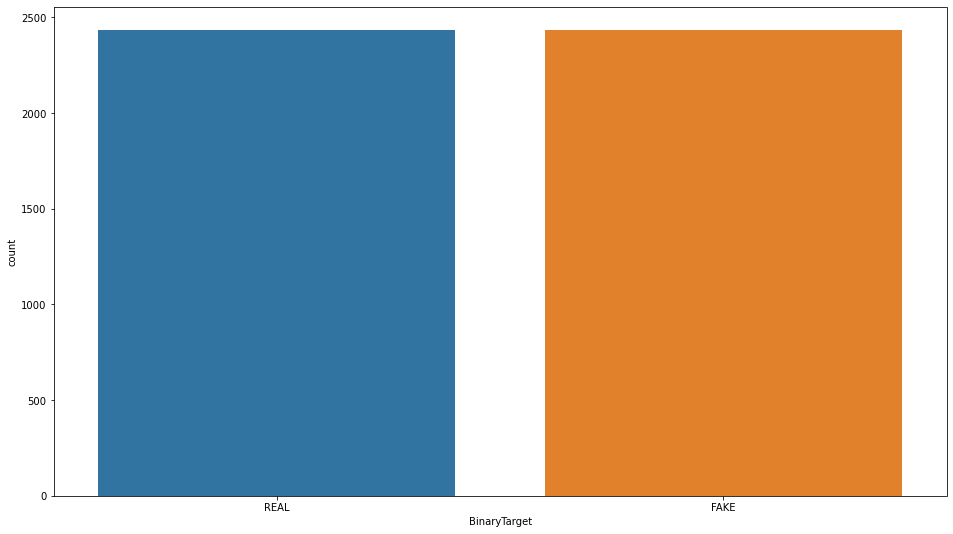

In [7]:
#distribution of classes for prediction
plt.figure(figsize=(16,9))
sns.countplot(x="BinaryTarget",data=data)
#so we can see,our data is fairly evenly distributed between the two classes

# Data Preprocessing

In [8]:
# counting the number of missing values in the dataset
data.isnull().sum()

Unnamed: 0         0
author             0
statement          0
source             0
target             0
BinaryTarget       0
BinaryNumTarget    0
dtype: int64

In [9]:
# merging the author name and news title as this is our independent variables
data['content'] = data['author']+' '+data["source"] +" " + data['statement'] 


In [10]:
#cleanig the data which includes considerng a to z letters also the letters are in lower case amd removing the stop words
#listing out stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

#Stemming:

Stemming is the process of reducing a word to its Root word

example: actor, actress, acting --> act

In [11]:
port_stem = PorterStemmer()
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content) 
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [12]:
data['content'] = data['content'].apply(stemming)

#printing the dataset
print(data['content'])

0       jill terreri ny depart correct commun supervis...
1       eleanor hildebrandt cindi axn iowa rank th u i...
2       emili zirkelbach david gura fun fact west virg...
3       madelin heim kelda helen roy say gubernatori c...
4       sabin martin randi feenstra biden administr pu...
                              ...                        
2431    loui jacobson donald trump elector colleg much...
2432    ami sherman donald trump server pakistani gent...
2433             lucia geng blogger nasa pay stay bed day
2434    kiannah sepeda miller juliana stratton gov bru...
2435    w gardner kendal scudder bob hall never succes...
Name: content, Length: 4870, dtype: object


# WordCloud 

In [13]:
#Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates 
#its frequency or importance. Significant textual data points can be highlighted using a word cloud 

from wordcloud import WordCloud ,STOPWORDS
real_words = ""
fake_words = ""
stopwords= set(STOPWORDS)
#iterate through the data
for val in data[data["BinaryNumTarget"]==1].content:
    
    #split the value
    tokens = val.split()
    
    #convet each tokens into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        
    real_words += " ".join(tokens)+ " "
    
for val in data[data["BinaryNumTarget"]==0].content:
    
    #split the value
    tokens = val.split()
    
    #convet each tokens into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        
    fake_words += " ".join(tokens)+ " "
    


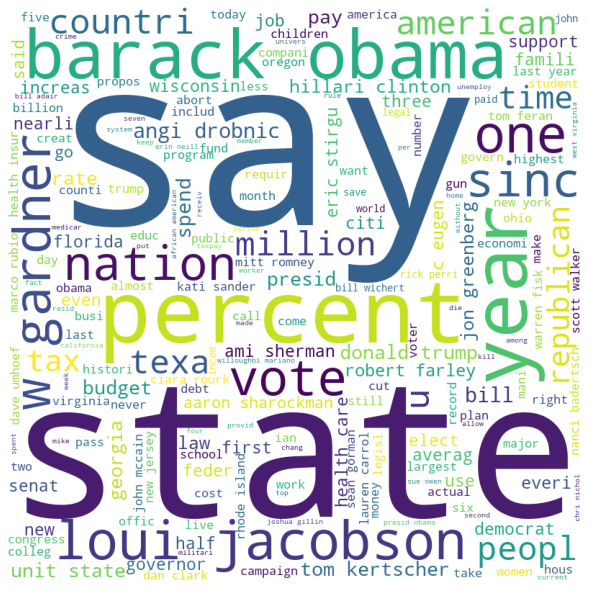

In [14]:
#for real news

wordcloud = WordCloud(width= 800,height=800,background_color="white",stopwords=stopwords,
                     min_font_size =10).generate(real_words)

#plotting the wordcloud image
plt.figure(figsize=(8,8))
plt.imshow(wordcloud) #pyplot module of matplotlib library is used to display data as an image; i.e. on a 2D regular raster.
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


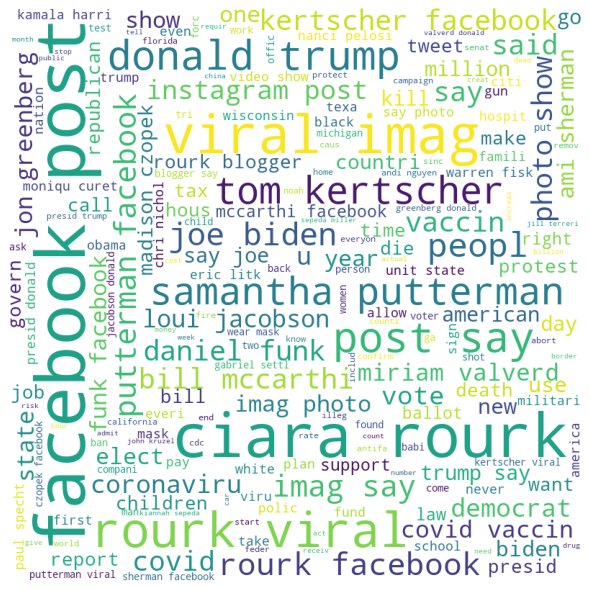

In [15]:
#for fake news

wordcloud = WordCloud(width= 800,height=800,background_color="white",stopwords=stopwords,
                     min_font_size =10).generate(fake_words)

#plotting the wordcloud image
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


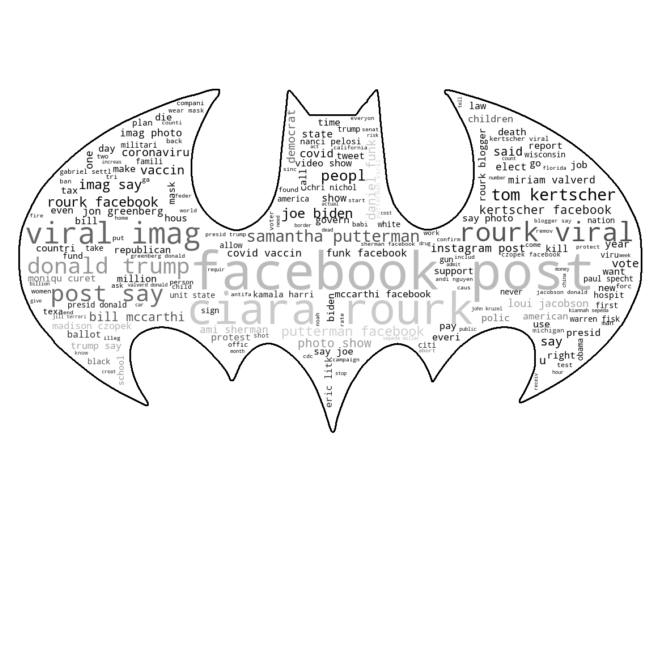

In [21]:
# for fake news

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt #to display our wordcloud
from PIL import Image #to load our image
import numpy as np #to get the color of our image

#Content-related

stopwords = set(STOPWORDS)

#Appearance-related
custom_mask = np.array(Image.open('batman.png')) 
wc = WordCloud(width= 800,height=800,background_color = 'white',
               stopwords = stopwords,
               mask = custom_mask,
               contour_width = 3,
               contour_color = 'black')

wc.generate(fake_words)
image_colors = ImageColorGenerator(custom_mask)
wc.recolor(color_func = image_colors)

#Plotting
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

wc.to_file('Batman_wordcloud.png')

In [23]:
X = data['content'].values
Y = data['BinaryNumTarget'].values

In [24]:
#Splitting the dataset to training & test data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, stratify=Y, random_state=2)

# FEATURES EXTRACTION AND MODELING

In [25]:
# USING COUNT VECTORIZATION 

from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(stop_words="english")
count_train = count_vectorizer.fit_transform(X_train) 

#fit = it will consider all unique words and give index to them alphabetically
#transform = it will count thr frequency of words at given index

In [26]:
print(count_vectorizer.vocabulary_)

{'ciara': 970, 'rourk': 4816, 'viral': 5974, 'imag': 2675, 'week': 6073, 'time': 5654, 'chang': 906, 'moon': 3705, 'friday': 2140, 'th': 5607, 'photo': 4234, 'earth': 1685, 'venu': 5941, 'jupit': 2955, 'seen': 4978, 'mar': 3423, 'loui': 3325, 'jacobson': 2844, 'nanci': 3785, 'pelosi': 4180, 'reauthor': 4577, 'children': 943, 'health': 2473, 'insur': 2774, 'program': 4423, 'year': 6201, 'save': 4900, 'billion': 526, 'michael': 3598, 'majchrowicz': 3390, 'say': 4903, 'meghan': 3548, 'markl': 3447, 'paid': 4087, 'million': 3622, 'interview': 2792, 'oprah': 4006, 'michel': 3599, 'obama': 3947, 'state': 5319, 'determin': 1481, 'outcom': 4036, 'presidenti': 4379, 'race': 4508, 'win': 6132, 'margin': 3434, 'averag': 347, 'vote': 5996, 'precinct': 4358, 'rick': 4734, 'perri': 4209, 'creat': 1262, 'job': 2906, 'combin': 1066, 'eric': 1811, 'stirgu': 5361, 'david': 1361, 'ralston': 4535, 'feder': 1966, 'regul': 4625, 'requir': 4674, 'georgia': 2227, 'driver': 1645, 'licens': 3239, 'renew': 4652,

In [27]:
count_test= count_vectorizer.fit_transform(X_test)
print (count_vectorizer.get_feature_names())

['aaa', 'aaron', 'abaco', 'abandon', 'abbott', 'abc', 'abduct', 'abdul', 'abl', 'abolish', 'abort', 'abraham', 'absent', 'absente', 'absolut', 'abstin', 'abus', 'accept', 'access', 'accid', 'accomplish', 'accord', 'account', 'acct', 'accumul', 'achiev', 'acknowledg', 'aclu', 'acorn', 'acquir', 'act', 'action', 'activ', 'actor', 'actual', 'ad', 'adair', 'adam', 'adcock', 'add', 'addict', 'addit', 'address', 'adhd', 'adjust', 'adkisson', 'admin', 'administ', 'administr', 'admiss', 'admit', 'admonish', 'adolf', 'adopt', 'adriel', 'adult', 'advanc', 'advantag', 'advers', 'advertis', 'advic', 'advis', 'advisor', 'advoc', 'affair', 'affect', 'affili', 'afford', 'afghanistan', 'africa', 'african', 'aftermath', 'afterward', 'agaisnt', 'age', 'agenc', 'agenda', 'agent', 'ago', 'agre', 'agreement', 'agricultur', 'ahead', 'ahmadinejad', 'aid', 'aig', 'ainsley', 'air', 'airborn', 'airlin', 'airplan', 'airport', 'ak', 'akira', 'al', 'alan', 'albert', 'album', 'albuquerqu', 'alcohol', 'alec', 'alert

# MULTINOMIAL_NB CLASSIFIER

In [28]:
#Multinomial Naive Bayes algorithm is a probabilistic learning method that is mostly used in Natural Language Processing (NLP). 
#The algorithm is based on the Bayes theorem

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import metrics
c_pipeline = Pipeline([("NBCV",count_vectorizer),("NB_CLF",MultinomialNB())])
c_pipeline.fit(X_train,Y_train)

Pipeline(steps=[('NBCV', CountVectorizer(stop_words='english')),
                ('NB_CLF', MultinomialNB())])

In [29]:
predicted1= c_pipeline.predict(X_train)
score = metrics.accuracy_score(Y_train,predicted1)
print(score)

0.9423666462293072


In [30]:
predicted_test= c_pipeline.predict(X_test)
score = metrics.accuracy_score(Y_test,predicted_test)
print(score)

0.9036069651741293


# confusion matrix

In [38]:

from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(Y_test,predicted_test)

print(cf_matrix)



[[713  91]
 [ 64 740]]


[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

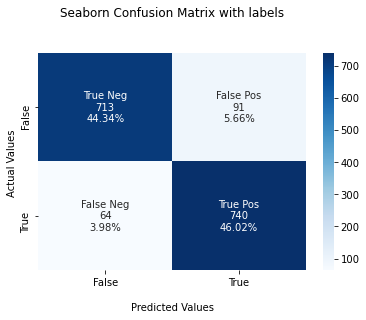

In [39]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in   #remove scientific sign (e^)
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in  #want 2 decima;s only in percentage
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)    #getting 2 dim array to concatenate it to labels

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

In [42]:
# USING TF-IDF 
# converting the textual data to numerical data
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)
tfidf_xtrain= tfidf_vectorizer.fit_transform(X_train)
tfidf_test= tfidf_vectorizer.fit_transform(X_test)


In [43]:
print (tfidf_vectorizer.get_feature_names()[-10:])

['zeller', 'zephyr', 'zerlina', 'zero', 'zika', 'zimmerman', 'zip', 'zombi', 'zone', 'zpass']


In [44]:
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.pipeline import Pipeline
#from sklearn import metrics
nbc_pipeline = Pipeline([("NB-TFIDF",tfidf_vectorizer),("NB_CLF",MultinomialNB())])
nbc_pipeline.fit(X_train,Y_train)

Pipeline(steps=[('NB-TFIDF', TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('NB_CLF', MultinomialNB())])

In [45]:
predicted2= nbc_pipeline.predict(X_train)
score = metrics.accuracy_score(Y_train,predicted2)
print(score)

0.9420600858369099


In [46]:
predicted2_test= nbc_pipeline.predict(X_test)
score = metrics.accuracy_score(Y_test,predicted2_test)
print(score)

0.9029850746268657


[[717  87]
 [ 69 735]]


[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

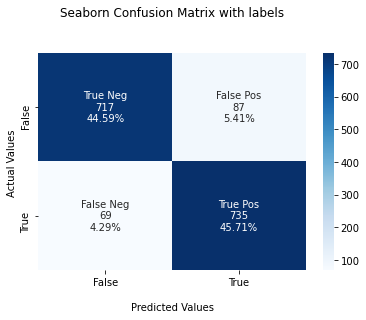

In [56]:
cf_matrix_tfidf = confusion_matrix(Y_test,predicted2_test)

print(cf_matrix_tfidf)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in   #remove scientific sign (e^)
                cf_matrix_tfidf.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in  #want 2 decima;s only in percentage
                     cf_matrix_tfidf.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)    #getting 2 dim array to concatenate it to labels

ax = sns.heatmap(cf_matrix_tfidf, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


In [32]:
print(metrics.classification_report(Y_test,predicted2_test))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       804
           1       0.89      0.91      0.90       804

    accuracy                           0.90      1608
   macro avg       0.90      0.90      0.90      1608
weighted avg       0.90      0.90      0.90      1608



# LOGISTIC REGRESSION :


In [48]:
lr_pipeline = Pipeline([("NBCV",count_vectorizer),("LR_CLF",LogisticRegression())])
lr_pipeline.fit(X_train,Y_train)

Pipeline(steps=[('NBCV', CountVectorizer(stop_words='english')),
                ('LR_CLF', LogisticRegression())])

In [49]:
predicted_lr= lr_pipeline.predict(X_train)
score = metrics.accuracy_score(Y_train,predicted_lr)
print(score)

0.9911097486204782


In [50]:
predicted_lr_test= lr_pipeline.predict(X_test)
score = metrics.accuracy_score(Y_test,predicted_lr_test)
print(score)

0.8986318407960199


[[697 107]
 [ 56 748]]


[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

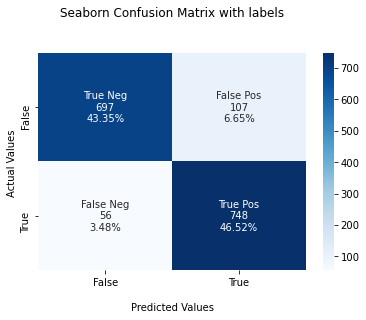

In [55]:
cf_lr1 = confusion_matrix(Y_test,predicted_lr_test)

print(cf_lr1)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in   #remove scientific sign (e^)
               cf_lr1.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in  #want 2 decima;s only in percentage
                     cf_lr1.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)    #getting 2 dim array to concatenate it to labels

ax = sns.heatmap(cf_lr1, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


In [52]:
#tf-idf
lr_tf_pipeline = Pipeline([("NB-TFIDF",tfidf_vectorizer),("NB_CLF",LogisticRegression())])
lr_tf_pipeline.fit(X_train,Y_train)

Pipeline(steps=[('NB-TFIDF', TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('NB_CLF', LogisticRegression())])

In [38]:
predicted_lr_tf_train= lr_tf_pipeline.predict(X_train)
score = metrics.accuracy_score(Y_train,predicted_lr_tf_train)
print(score)

0.9445125689760883


In [39]:
predicted_lr_tf_test= lr_tf_pipeline.predict(X_test)
score = metrics.accuracy_score(Y_test,predicted_lr_tf_test)
print(score)

0.8961442786069652


[[697 107]
 [ 56 748]]


[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

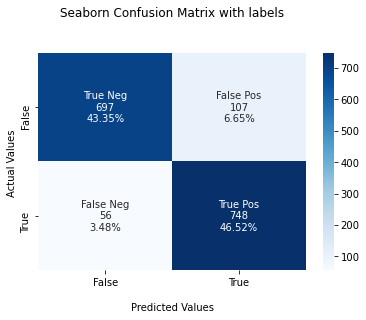

In [57]:
cf_lr2 = confusion_matrix(Y_test,predicted_lr_test)

print(cf_lr2)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in   #remove scientific sign (e^)
               cf_lr2.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in  #want 2 decima;s only in percentage
                     cf_lr2.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)    #getting 2 dim array to concatenate it to labels

ax = sns.heatmap(cf_lr2, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

In [41]:
print(metrics.classification_report(Y_test,predicted_lr_tf_test))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89       804
           1       0.86      0.94      0.90       804

    accuracy                           0.90      1608
   macro avg       0.90      0.90      0.90      1608
weighted avg       0.90      0.90      0.90      1608



# PASSIVE AGGRESSIVE CLASSIFIER

In [42]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf= Pipeline([("PAC-TFIDF",tfidf_vectorizer),("PAC_CLF",PassiveAggressiveClassifier())])
linear_clf.fit(X_train,Y_train)

Pipeline(steps=[('PAC-TFIDF',
                 TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('PAC_CLF', PassiveAggressiveClassifier())])

In [43]:
predicted_pac_test= linear_clf.predict(X_test)
score = metrics.accuracy_score(Y_test,predicted_pac_test)
print(score)

0.8905472636815921


[[697 107]
 [ 56 748]]


[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

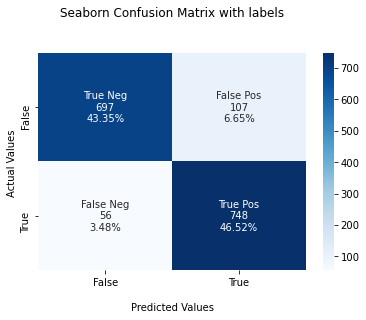

In [58]:
pac = confusion_matrix(Y_test,predicted_lr_test)

print(pac)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in   #remove scientific sign (e^)
               pac.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in  #want 2 decima;s only in percentage
                     pac.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)    #getting 2 dim array to concatenate it to labels

ax = sns.heatmap(pac, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# PREDICTIVE SYSTEM

In [59]:
# we got naive bayes is best model among all classifiers, so we are going to use naive bayes for our prdiction
#naive bayes gave accuracy of 94.2% on training data and 90.3 % on testing data by using tf-idf

# saving best model
import pickle
model_file = "final_model.sav"
pickle.dump(nbc_pipeline,open(model_file,"wb"))

In [60]:
var=input("please enter news title,source and author name you want to verify: ")

#function for prdiction
def detecting_fake_news(var):
    
    #retrieving best model for prediction call
    load_model= pickle.load(open("final_model.sav","rb"))
    prediction = load_model.predict([var])
    
    return (print("The given news is ",prediction))

if __name__ == "__main__":
    detecting_fake_news(var)
    
    
    
    
    

please enter news title,source and author name you want to verify: nikhil ghase facebook post spiderman is real and ruling the world
The given news is  [0]


In [67]:
print(fake.iloc[2,2])
print(fake.iloc[2,:])


NASA study says snake plants can produce enough oxygen for humans to live in a sealed room.
Unnamed: 0                                                         3
author                                                  Jill Terreri
statement          NASA study says snake plants can produce enoug...
source                                                Facebook posts
target                                                         False
BinaryTarget                                                    FAKE
BinaryNumTarget                                                    0
Name: 3, dtype: object


In [68]:
var=input("please enter news title,source and author name you want to verify: ")

#function for prdiction
def detecting_fake_news(var):
    
    #retrieving best model for prediction call
    load_model= pickle.load(open("final_model.sav","rb"))
    prediction = load_model.predict([var])
    
    return (print("The given news is ",prediction))

if __name__ == "__main__":
    detecting_fake_news(var)
    
    
    
    
    

please enter news title,source and author name you want to verify: Jill Terreri Facebook posts NASA study says snake plants can produce enough oxygen for humans to live in a sealed room.
The given news is  [0]


In [70]:
print(real.iloc[2,2])
print(real.iloc[2,:])


“FUN FACT: West Virginia is home to zero billionaires.”
Unnamed: 0                                                         2
author                                              Emily Zirkelbach
statement          “FUN FACT: West Virginia is home to zero billi...
source                                                    David Gura
target                                                          True
BinaryTarget                                                    REAL
BinaryNumTarget                                                    1
Name: 2, dtype: object


In [72]:
var=input("please enter news title,source and author name you want to verify: ")

#function for prdiction
def detecting_fake_news(var):
    
    #retrieving best model for prediction call
    load_model= pickle.load(open("final_model.sav","rb"))
    prediction = load_model.predict([var])
    
    return (print("The given news is ",prediction))

if __name__ == "__main__":
    detecting_fake_news(var)
    

please enter news title,source and author name you want to verify: mark pokan Laura Schulte “The annual Pentagon budget hovers over $750 billion annually, twice that of the much debated Build Back Better Act that costs about $350 billion annually as currently proposed.”
The given news is  [1]
